## Would you have survived Titanic if you were aboard? 
                                                                                                        --Sayed Hisham

This notebook evaluates the dataset with details of all the passengers who were aboard the Titanic and tries to bring up a model the predict the chances of survival of anybody with any given parameters within the scope of the dataset. 

## Data Dictionary
Variables, Definitions and	Key \
survival	- Survival	0 = No, 1 = Yes
pclass	- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	- Sex	
Age- 	Age - in years	
sibsp	= # of siblings / spouses aboard the Titanic	
parch	- # of parents / children aboard the Titanic	
ticket	- Ticket number	
fare	- Passenger fare	
cabin	 - Cabin number	
embarked	 - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Importing libraries

In [339]:
import pandas as pd
import numpy as np
from scipy import stats #chisqure
from scipy.stats import norm #chisqu
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm #significace logistic
from sklearn.tree import DecisionTreeClassifier #decisiontres
from sklearn import metrics #for decision trees model evaluation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor #For randomforest
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss


RSEED=50
print("All libraries imported!!")

All libraries imported!!


## I. Data Preprrocessing and cleaning

### 1. Loading Data set & Identifying Missing data

In [340]:
df=pd.read_csv('titanic.csv')
df.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [341]:
# replace empty to NaN
df.replace("", np.nan, inplace = True)

In [342]:
#making missing data into another df
missing_data = df.isnull()

In [343]:
missing_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [344]:
#making a count of missing data in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

PassengerId
False    1309
Name: PassengerId, dtype: int64

Survived
False    1309
Name: Survived, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

Age
False    1046
True      263
Name: Age, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Cabin
True     1014
False     295
Name: Cabin, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64



## 2. Understanding missing data:
Based on above derived data:\
we have:\
Age: 263 missing items \
fare: 1  missing items\
Cabin: 295 missing items\
embarked: 2 missing items

"Age" can be replaced by mean.\
"Fare" can also be replaced by mean.\
"Cabin" can be removed from dataset as it is a unique item in each record\
"embarked" can be replaced by the mode on the 2 missing records

### 2.1 Replacing missing data with mean in age and fare

In [345]:
avg_age = df['Age'].astype('float').mean(axis=0)
print("Average age:", avg_age)
avg_fare=df['Fare'].astype('float').mean(axis=0)
print("Average fare:", avg_fare)

Average age: 29.881137667304014
Average fare: 33.2954792813456


In [346]:
##replacing nan values with mean in age and fare

df['Age'].replace(np.nan, avg_age, inplace=True)
df['Fare'].replace(np.nan, avg_fare, inplace= True)

In [347]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [348]:
#df["Age_groups"]=pd.cut(np.array(df['Age']), 3, labels=["Young", "Middle", "Elderly"])
#df["Fare_groups"]=pd.cut(np.array(df['Fare']), 3, labels = ["Low", "Medium", "High"])

In [349]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### Finding out the mode and replacing incase of embark station

In [350]:
df['Embarked'].value_counts()
#df['Embarked'].value_counts().idxmax()


S    914
C    270
Q    123
Name: Embarked, dtype: int64

'S' is the most common embark seaport. Hence we replace missing data with 'S'

In [351]:
df["Embarked"].replace(np.nan, "S", inplace=True)

## 3. Now lets drop irrelevent columns from the dataset such as  names and cabin

In [352]:
df.drop(columns=["Cabin","Name","Ticket"], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [353]:
## For simplicity, lets make all data into int type where it is float
#df['Age']=df['Age'].astype('int')
#df['Fare']=df['Fare'].astype('int')

In [354]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## II. Train and Test split

Now we can have a 80/20 split of train and test of the dataset

In [355]:
#Saving the clean data
df.to_csv("clean_data.csv", index = None)

#masking into two way split of train and test data

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [356]:
print("Shape of train dataset:", train.shape)
print("shape of test dataset:", test.shape)

Shape of train dataset: (1029, 9)
shape of test dataset: (280, 9)


In [357]:
#saving the dataset train and test locally
train.to_csv("train_dataset.csv", index = None)
test.to_csv("test_dataset.csv", index = None)

In [358]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

## Now we have a totally clean data, We can move on to feature-engineering or test of significance

## III. Feature engineering

### Since all relevent data in the table in categorical, we go with chi-square test for each coloumn vs survived

In [359]:
#first lets check significance of Pclass
significantcolumn=[]
insignificantcolumn=[]
for column in list(train.columns.values):
    if(column== 'Survived' or column== 'PassengerId' or column == 'Age'
      or column== "Fare"):
        print('')
    else:
        contingency_table = pd.crosstab(
            train['Survived'],
            train[column],
            margins = True
        )
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
        print("Chisquare test for column:", column, "| Chi2_stat:", round(chi2_stat,2), "| Dof: ", dof, 
              "| p-vale: ", round(p_val,5), " |")
        if(p_val<=0.05):
            print("Column", column, "is significant \n")
            significantcolumn.append(column)
        else:
            print("Column", column, "is not significant \n")
            insignificantcolumn.append(column)
            




Chisquare test for column: Pclass | Chi2_stat: 58.59 | Dof:  6 | p-vale:  0.0  |
Column Pclass is significant 

Chisquare test for column: Sex | Chi2_stat: 477.88 | Dof:  4 | p-vale:  0.0  |
Column Sex is significant 


Chisquare test for column: SibSp | Chi2_stat: 27.97 | Dof:  14 | p-vale:  0.01435  |
Column SibSp is significant 

Chisquare test for column: Parch | Chi2_stat: 45.53 | Dof:  14 | p-vale:  3e-05  |
Column Parch is significant 


Chisquare test for column: Embarked | Chi2_stat: 16.9 | Dof:  6 | p-vale:  0.00964  |
Column Embarked is significant 



### Now we check column fare and Age for significance using logistic regression

In [360]:
#we can remove the agegroups and faregroups since we can check the age itself for signifiance

#train.drop(columns=['Age_groups', "Fare_groups", "PassengerId"], inplace = True, axis=1)
#test.drop(columns=['Age_groups', "Fare_groups", "PassengerId"], inplace = True, axis=1)

In [361]:
## Scikit learn literally doesn't let you  get the coefficient of significance for logistic regression

## so here I am, doing the logistic regression manually with bit of help from stackoverflow

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values for age
x = np.array(train['Age'])[:, np.newaxis]
y = np.array(train['Survived'])
model = LogisticRegression(C=1e30).fit(x, y)
print("p-value for age")
print(logit_pvalue(model, x))

p=list(logit_pvalue(model, x))
if(p[1]<=0.05):
    print("Age is significant")
    significantcolumn.append("Age")
else:
    print("Age is not significant")
    insignificantcolumn.append("Age")
    
    
# test p-values
x = np.array(train['Fare'])[:, np.newaxis]
y = np.array(train['Survived'])
model = LogisticRegression(C=1e30).fit(x, y)
print("\np-value for Fare")
print(logit_pvalue(model, x))
p=list(logit_pvalue(model, x))
if(p[1]<=0.05):
    print("Fare is significant")
    significantcolumn.append("Fare")
else:
    print("Fare is not significant")
    insignificantcolumn.append("Fare")




# compare with statsmodels
#sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
#print(sm_model.pvalues)
#sm_model.summary()

p-value for age
[0.07 0.1 ]
Age is not significant

p-value for Fare
[0.00e+00 3.19e-10]
Fare is significant


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Replacing numbers to string variables

In [362]:
train.replace('female',0, inplace = True)
train.replace('male',1, inplace = True)
test.replace('female',0, inplace = True)
test.replace('male', 1, inplace= True)
train.replace('C', 0, inplace =True)
train.replace('Q', 1, inplace= True)
train.replace('S', 2, inplace = True)
test.replace('C', 0, inplace =True)
test.replace('Q', 1, inplace= True)
test.replace('S', 2, inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


## Now we have the following columns as significant attributes that determined survival

In [363]:
print(significantcolumn)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare']


In [364]:
## we can drop the columns that are not significant from both test and train
train.drop(columns=['PassengerId', 'Age'], axis=1, inplace = True)
test.drop(columns=['PassengerId', 'Age'], axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# IV. Algorithm generation

Trying 3 classification algorithms: 1. Decision trees 2. RandomForest Classifier 3. Logistic Regression

## 1. Decision Trees

In [365]:
# X is the attributes and y is dependant variable
X = train[significantcolumn].values
y = train['Survived']

In [366]:
SurvivalTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SurvivalTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [367]:
SurvivalTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [368]:
#Making predicticion from test set
X_test = test[significantcolumn].values
predTree = SurvivalTree.predict(X_test)
predTree

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [369]:
## and predicted survival to test df
test['Predicted_survival']=predTree

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [370]:
print("DecisionTrees's Accuracy: ", round( metrics.accuracy_score(test['Survived'], predTree)*100, 2), "%")

DecisionTrees's Accuracy:  87.14 %


In [371]:
test.to_csv("Decisiontree_prediction.csv", index = None)

## 2. Random Forests

In [372]:
df=pd.read_csv("clean_data.csv")

In [373]:
#tdf = pd.concat([train, test])
df.drop("PassengerId", inplace = True , axis=1)
df.drop("Age", inplace = True, axis=1)
df = pd.get_dummies(df)

In [374]:
labels = np.array(df.pop('Survived'))
#print(labels.shape)
train, test, train_labels, test_labels = train_test_split(df,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)








In [375]:
#train = train.fillna(train.mean())
#test = test.fillna(test.mean())

In [376]:
features = list(train.columns)

In [377]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


In [378]:
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [379]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]
#print(type(rf_predictions))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Average number of nodes 270
Average maximum depth 15


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


### 2.1 Evuluation
a. Confusion metrix
b. Jaccard score similarity evaluation of the model

Recall Baseline: 1.0 Test: 0.76 Train: 0.9
Precision Baseline: 0.38 Test: 0.77 Train: 0.94
Roc Baseline: 0.5 Test: 0.88 Train: 0.98


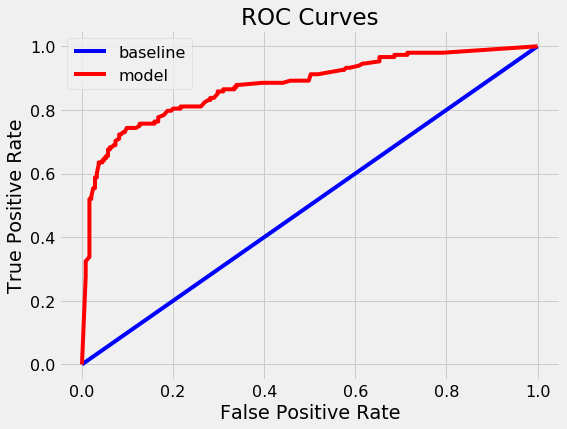

Confusion matrix, without normalization
[[211  34]
 [ 36 112]]


<Figure size 432x288 with 0 Axes>

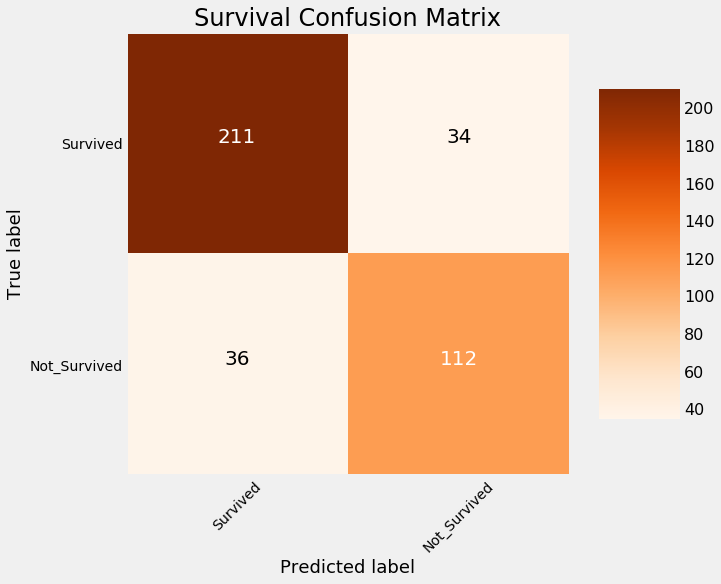

In [380]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Survived', 'Not_Survived'],
                      title = 'Survival Confusion Matrix')

plt.savefig('cm.png')

b. Jaccard Score

In [381]:

print("Your Jaccard score is: ", round(jaccard_similarity_score(test_labels, rf_predictions)*100, 2), "%")

Your Jaccard score is:  82.19 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [382]:
"""Saving file locally"""
Random_forest=test
Random_forest["Survival"]=test_labels
Random_forest["Predicted_survival"]= rf_predictions
Random_forest.to_csv("Random_forest_predictions.csv", index = None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### 3. Logistic Regression

In [383]:
df=pd.read_csv("clean_data.csv")


In [384]:
df.drop(columns= ['PassengerId'], axis=1, inplace = True)

In [385]:
df = pd.get_dummies(df)
y = np.array(df.pop('Survived'))
X= np.asarray(df)

In [386]:

X = preprocessing.StandardScaler().fit(X).transform(X)

In [387]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (1047, 10) (1047,)
Test set: (262, 10) (262,)


In [388]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [389]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [390]:
yhat_prob = LR.predict_proba(X_test)


### 3.1 Evaluation

In [391]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 88  17]
 [ 22 135]]


Confusion matrix, without normalization
[[ 88  17]
 [ 22 135]]


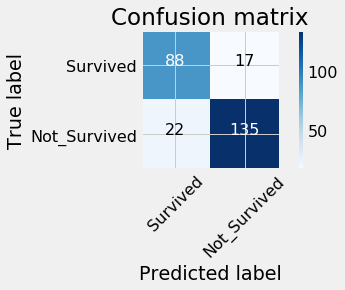

In [392]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived','Not_Survived'],normalize= False,  title='Confusion matrix')

Jacquard Score

In [393]:
print("Your Jaccard score is: ", round(jaccard_similarity_score(y_test, yhat)*100,2), "%")

Your Jaccard score is:  85.11 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [394]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       157
           1       0.80      0.84      0.82       105

    accuracy                           0.85       262
   macro avg       0.84      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



In [395]:
print("Your logloss value is:", round(log_loss(y_test, yhat_prob), 3))

Your logloss value is: 0.402


### V. Result

Accuracy:
1. Decision Trees      : 87% 
2. Random Forest       : 82%
3. Logistic regression : 85% \
From the three tests of alogorithm, we can come to a conclusion that the decision trees tend to be more accurate. Hence we choose Algorithm I to predict survival.

-- By Sayed Hisham